# AUTO MACHINE LEARNING
### I try to check if pycaret can beat my other notebook
#### My benchmark from that model: accuracy=0.7965 (xgb), AUC=0.845 (gbm)
### Same dataset used: diabetes

In [1]:
# need to install a few packages if it hasn't happen before
# !pip install pycaret

In [2]:
# need to install a few packages if it hasn't happen before
#!pip install shap

### packages

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pycaret.classification import *

### data

In [4]:
path = "c:\\datasets\\pima-indians-diabetes.csv"
columns = ['Pregnancies','PlasmaGlucoseConc','DBloodPressure','TricepsSkinFoldThick',
           'TwoHoursSerumInsulin','BMI','DiabetesPedigreeFunction','Age','target']

In [5]:
diabetes = pd.read_csv(path,header=None, names=columns)

In [6]:
diabetes.head()

,Pregnancies,PlasmaGlucoseConc,DBloodPressure,TricepsSkinFoldThick,TwoHoursSerumInsulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## predictions with pycaret

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   PlasmaGlucoseConc         768 non-null    int64  
 2   DBloodPressure            768 non-null    int64  
 3   TricepsSkinFoldThick      768 non-null    int64  
 4   TwoHoursSerumInsulin      768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   target                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
print("target=1:",len(diabetes[diabetes['target']==1]),"\ntarget=0:",len(diabetes[diabetes['target']==0]),
     "\nratio:","{:.0%}".format(len(diabetes[diabetes['target']==1])/len(diabetes)))

target=1: 268 
target=0: 500 
ratio: 35%


this ratio is fine. No need to rebalance the data

In [14]:
# automatic data type recognition
# I had to overwrite Pregnancies - so I forced to recognized as numeric
classifier = setup(data=diabetes,target='target',numeric_features=['Pregnancies'])

Setup Succesfully Completed!


,Description,Value
0,session_id,2786
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### compete models based on different metrics

In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.7766,0.8271,0.6158,0.7158,0.6516,0.4906,0.5013,0.3586
1,CatBoost Classifier,0.7747,0.8391,0.6254,0.7013,0.6534,0.4887,0.4968,5.5156
2,Ridge Classifier,0.7693,0.0000,0.5573,0.7208,0.6212,0.4617,0.4734,0.0278
3,Logistic Regression,0.7674,0.8277,0.5681,0.7111,0.6234,0.4608,0.4713,0.1123
4,Linear Discriminant Analysis,0.7656,0.8302,0.5629,0.7098,0.6198,0.4561,0.4669,0.0138
5,Ada Boost Classifier,0.7635,0.8125,0.6202,0.6776,0.6409,0.4665,0.4732,0.2785
6,Extra Trees Classifier,0.7618,0.8278,0.5617,0.7110,0.6162,0.4490,0.4630,0.3675
7,Light Gradient Boosting Machine,0.7597,0.8209,0.6468,0.6623,0.6478,0.4666,0.4728,0.1436
8,Random Forest Classifier,0.7581,0.8163,0.5570,0.6948,0.6119,0.4408,0.4506,0.0921
9,Naive Bayes,0.7542,0.8089,0.6099,0.6729,0.6319,0.4494,0.4570,0.0102


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2786, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### parameter tuning

Results are not bad, but worse than the benchmark.
Let's tune the parameters!

In [18]:
# for model type check the bottom of the official page:
# https://pycaret.org/classification/
GBM = create_model('gbc')
tuned_GBM = tune_model(GBM)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8662,0.9474,0.6429,0.7660,0.5970,0.6324
1,0.7593,0.8782,0.5263,0.7143,0.6061,0.4384,0.4490
2,0.7407,0.7895,0.4737,0.6923,0.5625,0.3874,0.4014
3,0.7222,0.7338,0.5789,0.6111,0.5946,0.3836,0.3839
4,0.7222,0.8331,0.6316,0.6000,0.6154,0.3982,0.3985
5,0.7407,0.8015,0.5789,0.6471,0.6111,0.4176,0.4190
6,0.7778,0.8150,0.6316,0.7059,0.6667,0.5008,0.5025
7,0.7358,0.7825,0.6111,0.6111,0.6111,0.4111,0.4111
8,0.7925,0.8508,0.7222,0.6842,0.7027,0.5435,0.5439
9,0.8113,0.8444,0.7222,0.7222,0.7222,0.5794,0.5794


disppointing result, let's force and change a few things

In [26]:
# n_iter=100 will significantly increae the run time for my not too stron machine
tuned_GBM1 = tune_model(GBM, n_iter=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.8962,0.8421,0.7273,0.7805,0.6473,0.6518
1,0.8333,0.9083,0.6842,0.8125,0.7429,0.6209,0.6259
2,0.7778,0.8301,0.4737,0.8182,0.6000,0.4609,0.4939
3,0.6852,0.7308,0.4737,0.5625,0.5143,0.2839,0.2862
4,0.7963,0.8451,0.5789,0.7857,0.6667,0.5248,0.5375
5,0.7593,0.8556,0.4737,0.7500,0.5806,0.4236,0.4456
6,0.7778,0.8406,0.5789,0.7333,0.6471,0.4882,0.4954
7,0.6981,0.8143,0.5000,0.5625,0.5294,0.3083,0.3095
8,0.8302,0.8857,0.7222,0.7647,0.7429,0.6163,0.6168
9,0.7925,0.8905,0.6111,0.7333,0.6667,0.5178,0.5223


pretty good AUC, let's try to improve further

In [20]:
tuned_GBM = tune_model(GBM, n_iter=100, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8148,0.8962,0.7895,0.7143,0.7500,0.6035,0.6054
1,0.7963,0.8962,0.5263,0.8333,0.6452,0.5123,0.5389
2,0.7593,0.8301,0.3684,0.8750,0.5185,0.3917,0.4569
3,0.6852,0.7865,0.4211,0.5714,0.4848,0.2656,0.2720
4,0.7593,0.8271,0.5263,0.7143,0.6061,0.4384,0.4490
5,0.7593,0.8211,0.4737,0.7500,0.5806,0.4236,0.4456
6,0.7963,0.8556,0.6316,0.7500,0.6857,0.5367,0.5410
7,0.7358,0.7571,0.5000,0.6429,0.5625,0.3775,0.3836
8,0.8302,0.8841,0.6111,0.8462,0.7097,0.5940,0.6098
9,0.8113,0.8603,0.5556,0.8333,0.6667,0.5423,0.5640


### check if xgb is really so bad?

In [23]:
XGB = create_model('xgboost')
tuned_XGB = tune_model(XGB, n_iter=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7407,0.8211,0.7895,0.6000,0.6818,0.4698,0.4825
1,0.7407,0.7444,0.4737,0.6923,0.5625,0.3874,0.4014
2,0.7037,0.7759,0.3684,0.6364,0.4667,0.2812,0.3013
3,0.6111,0.6105,0.3158,0.4286,0.3636,0.0928,0.0950
4,0.7037,0.7519,0.6316,0.5714,0.6000,0.3656,0.3668
5,0.6481,0.6602,0.3684,0.5000,0.4242,0.1792,0.1835
6,0.7037,0.6872,0.6316,0.5714,0.6000,0.3656,0.3668
7,0.6792,0.6651,0.5000,0.5294,0.5143,0.2751,0.2754
8,0.7547,0.8619,0.7222,0.6190,0.6667,0.4744,0.4780
9,0.8113,0.8476,0.6667,0.7500,0.7059,0.5677,0.5698


### disapointing result:(

### CatBoost is almost as good as the GBM, but better F1 and AUC (although we don't use cat features)!

In [27]:
CAT = create_model('catboost')
tuned_CAT = tune_model(CAT, n_iter=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9053,0.9474,0.7826,0.8571,0.7676,0.7770
1,0.8148,0.9143,0.6316,0.8000,0.7059,0.5735,0.5820
2,0.7778,0.8000,0.4737,0.8182,0.6000,0.4609,0.4939
3,0.7222,0.7579,0.5263,0.6250,0.5714,0.3682,0.3711
4,0.7407,0.8647,0.5263,0.6667,0.5882,0.4028,0.4088
5,0.7593,0.8481,0.5263,0.7143,0.6061,0.4384,0.4490
6,0.8333,0.8481,0.7368,0.7778,0.7568,0.6301,0.6307
7,0.7547,0.7587,0.6111,0.6471,0.6286,0.4457,0.4461
8,0.8491,0.8714,0.7778,0.7778,0.7778,0.6635,0.6635
9,0.8491,0.8460,0.7222,0.8125,0.7647,0.6542,0.6566


### Finally the logistic regression model

In [25]:
LR = create_model('lr')
tuned_LR = tune_model(LR, n_iter=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8148,0.8962,0.7895,0.7143,0.7500,0.6035,0.6054
1,0.7778,0.8872,0.5263,0.7692,0.6250,0.4749,0.4921
2,0.7222,0.8060,0.3158,0.7500,0.4444,0.2981,0.3477
3,0.6481,0.7203,0.3684,0.5000,0.4242,0.1792,0.1835
4,0.7593,0.8105,0.6316,0.6667,0.6486,0.4658,0.4661
5,0.8148,0.8812,0.5789,0.8462,0.6875,0.5624,0.5828
6,0.7037,0.7850,0.5263,0.5882,0.5556,0.3344,0.3355
7,0.7736,0.7698,0.6111,0.6875,0.6471,0.4812,0.4830
8,0.8113,0.8365,0.6667,0.7500,0.7059,0.5677,0.5698
9,0.8302,0.8794,0.6667,0.8000,0.7273,0.6055,0.6108


### let's pick the tuned_GBM1 for the rest of the project

## Evaluation of the picked model

In [28]:
print(tuned_GBM1)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=80,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=7,
                           min_weight_fraction_leaf=0.0, n_estimators=35,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2786, subsample=0.45000000000000007,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


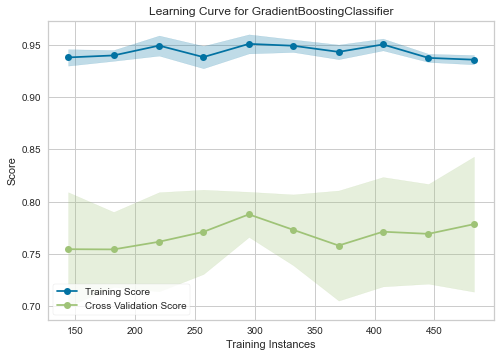

In [29]:
plot_model(tuned_GBM1,plot='learning')

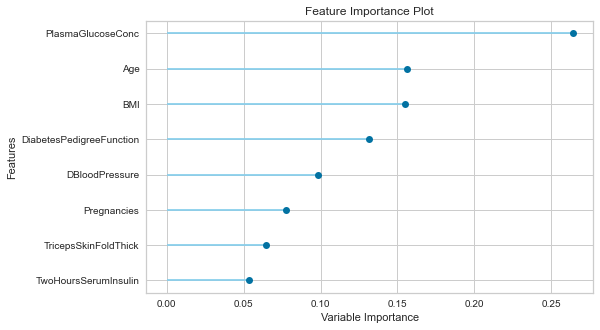

In [30]:
plot_model(tuned_GBM1,plot='feature')

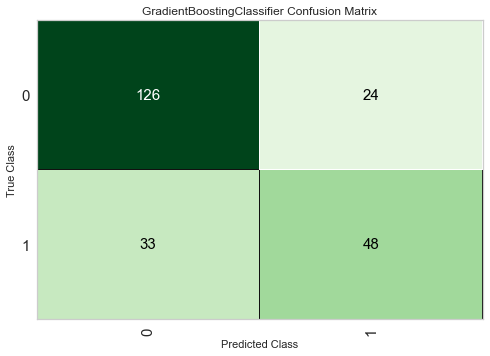

In [31]:
plot_model(tuned_GBM1,plot='confusion_matrix')

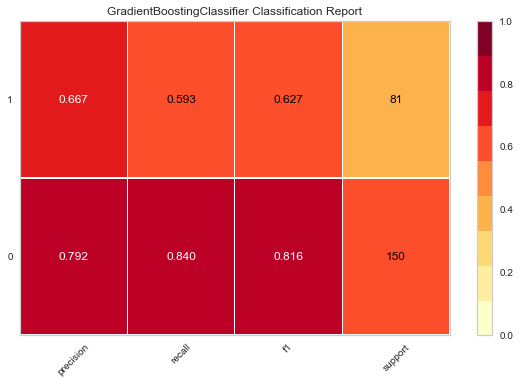

In [32]:
plot_model(tuned_GBM1,plot='class_report')

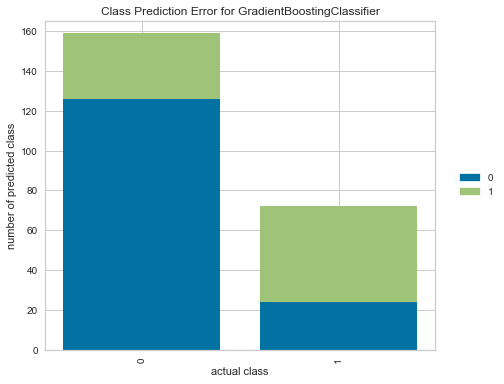

In [33]:
plot_model(tuned_GBM1,plot='error')

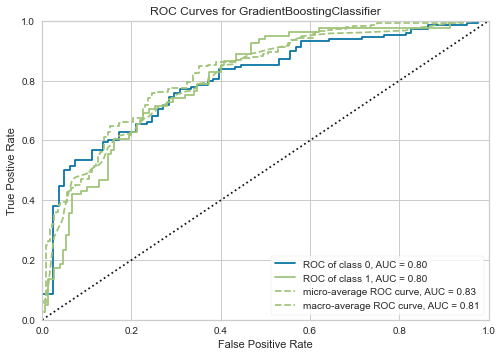

In [35]:
plot_model(tuned_GBM1, plot = 'auc')#ROC


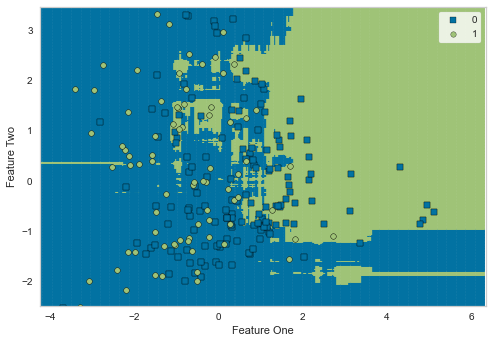

In [36]:
plot_model(tuned_GBM1, plot = 'boundary')# Decision Boundary


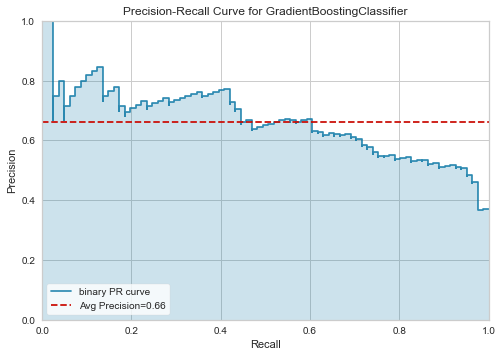

In [37]:
plot_model(tuned_GBM1, plot = 'pr')# Precision Recall Curve


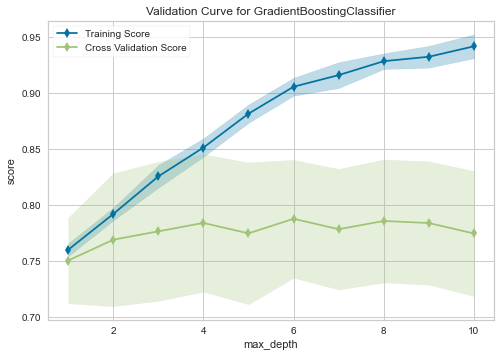

In [38]:
plot_model(tuned_GBM1, plot = 'vc')# Validation Curve

#### Using SHAP values (see my other notebook about SHAP interpretation)

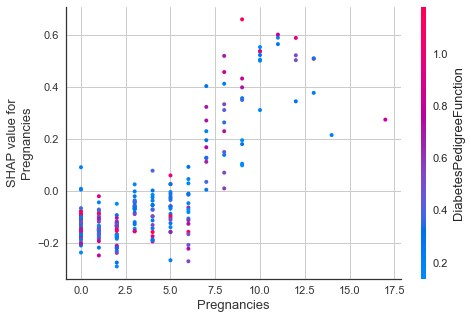

In [39]:
interpret_model(tuned_GBM1, plot ='correlation', feature = None, observation = None)

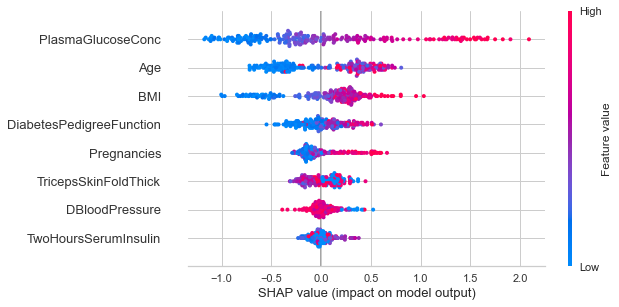

In [40]:
interpret_model(tuned_GBM1)

check the reaoning for a random record

In [42]:
interpret_model(tuned_GBM1, plot = 'reason', observation = 71) 

## using the evaluate model function - interactive dashboard

In [41]:
evaluate_model(tuned_GBM1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Save the model

In [43]:
save_model(tuned_GBM1, model_name = 'GBM_QUICK_SOLUTION')

Transformation Pipeline and Model Succesfully Saved


# Later can be loaded with load_model and apply predict_model 